---
title: "Big Brother Brasil - Uma análise exploratória com Python"
format: 
    html:
        code-fold: false
execute:
    enable: true
jupyter: python3
---

## Big Brother Brasil - Uma análise exploratória com Python

- Introdução
- Dados
    - Origem
    - Conhecendo os dados
- Desenvolvimento
    - Idade
    - Região
    - Ocupação
    - Gênero
    - Campeões
- Interativo
- Conclusão

In [31]:
import pandas as pd
import seaborn as sns
from unidecode import unidecode
from zodiac_sign import get_zodiac_sign
from datetime import date, datetime
from numpy import isnan

data_raw = pd.read_csv("data/dados.csv", sep = ";")
data_raw.head(5)

,nome,genero,data_nascimento,idade_participacao,ocupacao,municipio,pais,classificacao
0,Kleber de Paula Pedra (Bambam),male,14/02/1978,24.0,Dançarino,Campinas,São Paulo,1
1,Vanessa Melanie Pascale Ekypenyong Walborn,female,28/11/1974,28.0,Modelo,Rio de Janeiro,Rio de Janeiro,2
2,André Batista de Carvalho,male,28/11/1974,28.0,Professor de canto,Rio de Janeiro,Rio de Janeiro,3
3,Antonio Sergio Tavares Campo,male,06/12/1972,30.0,Cabeleireiro,Angola,Exterior,4
4,Alessandra Begliomini,female,05/12/1974,28.0,Empresária,São Paulo,São Paulo,5


### Introdução

Texto introduzindo sobre BBB

## Dados

### Origem

### Conhecendo os dados

In [3]:
data_raw.shape

(362, 8)

In [4]:
data_raw.dtypes

nome                   object
genero                 object
data_nascimento        object
idade_participacao    float64
ocupacao               object
municipio              object
pais                   object
classificacao           int64
dtype: object

#### A nossa base é composta por 362 linhas e 8 colunas. As linhas representam todos os participantes das ediçoes de 1 a 22 e as colunas representam algumas informações referentes a esses participantes:
- nome (str): nome completo do participante
- genero (str): genero do participante (para facilitar a analise, assumiu-se o gênero de acordo com o primeiro nome do participante)
- data_nasciment (date): data de nascimento
- idade_participacao (date): idade do participante no inicio do reality show
- ocupacao (str): profissões (em alguns casos, existe mais de uma profissão)
- municipio (str): municipio de nascimento 
- pais (str): pais de nascimento
- classificacao (int): colocação final no programa (1 = 1º lugar, 2 = 2º lugar, etc)

## Exploração

### Idade

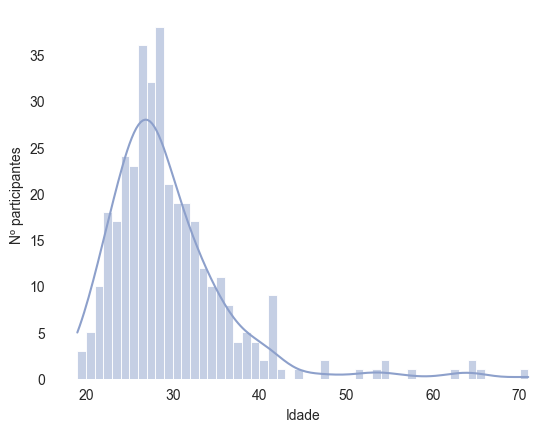

In [5]:
sns.set_style("white")
p = sns.histplot(data_raw, x = "idade_participacao", binwidth= 1, kde = True, color = sns.color_palette("Set2")[2])
p.set(xlabel = "Idade", ylabel = "Nº participantes")
sns.despine(left = True, bottom = True)

C:\Users\Carlos\AppData\Local\Temp\ipykernel_6268\1156136826.py:1: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.histplot(data_raw, x = "idade_participacao", hue = 'genero', kde = True, palette= sns.color_palette("Set2"))


<AxesSubplot: xlabel='idade_participacao', ylabel='Count'>

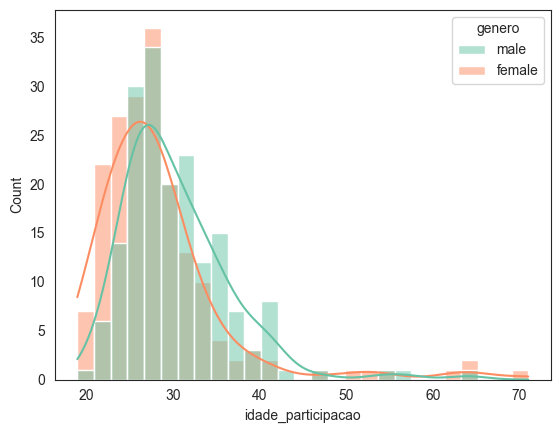

In [6]:
sns.histplot(data_raw, x = "idade_participacao", hue = 'genero', kde = True, palette= sns.color_palette("Set2"))

Apesar da média de idade ser bastante próxima, nota-se que pessoas do gênero feminino tendem a entrar na casa com idades mais baixas que do gênero masculino

Como curiosidade, podemos verificar também se determinado signo tem mais chances de entrar no programa do que outros

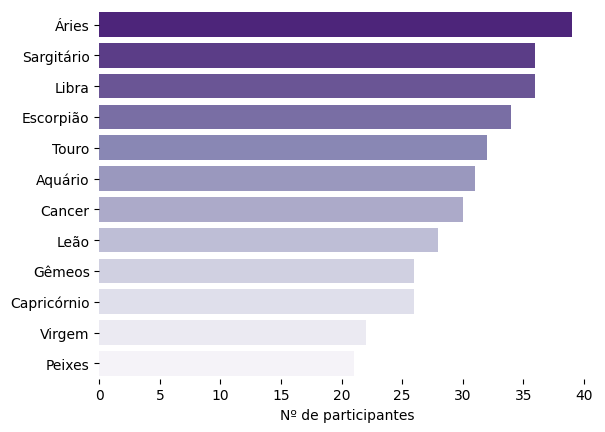

In [76]:
# date_str = "1998/05/29"
# date = datetime.strptime(date_str, "%d/%m/%Y")
# get_zodiac_sign(date)

def pegar_signo(data):
    try:
        data_formatada = datetime.strptime(data, "%d/%m/%Y")
        signo = get_zodiac_sign(data_formatada)
        return signo
    except:
        return None


data_raw['signo'] = data_raw.apply(lambda row: pegar_signo(row['data_nascimento']), axis = 1)
# data_raw.apply(lambda row: neutralizar_genero(row['ocupacao']), axis = 1)
plot = sns.countplot(y = data_raw['signo'], order = data_raw['signo'].value_counts().index, palette = "Purples_r")
plot.set(xlabel = "Nº de participantes", ylabel = "")
sns.despine(left = True, bottom = True)

Quando comparamos também o gênero, nota-se que há uma tendência de mulheres mais novas serem chamadas mais do que homens.
E em relação e vitórias, será que existe alguma idade que possui mais chance de vencer?

In [7]:
data_raw.groupby("idade_participacao").agg(
    n_participantes = ("idade_participacao", "count"),
    pos_media = ("classificacao", "mean")
).sort_values("pos_media").reset_index().rename({"idade_participacao": "Idade", "n_participantes": "Nº participantes", "pos_media": "Colocacao média"}, axis = 1).head(5)

,Idade,Nº participantes,Colocacao média
0,71.0,1,3.0
1,57.0,1,3.0
2,44.0,1,5.0
3,51.0,1,6.0
4,21.0,10,6.1


In [53]:
data_raw.query("classificacao != 99").groupby(['idade_participacao']).agg(
    participacoes = ("idade_participacao", "count"),
    class_media = ("classificacao", "mean")
).query("participacoes >= 2").sort_values("class_media", ascending = True).reset_index().rename({"idade_participacao": "Idade", "class_media": "Classificacao média"}, axis = 1).head(10)

,Idade,participacoes,Classificacao média
0,21.0,10,6.100000
1,40.0,2,6.500000
2,36.0,7,6.714286
3,20.0,5,6.800000
4,27.0,31,7.967742
5,19.0,3,8.000000
6,34.0,9,8.000000
7,23.0,17,8.235294
8,31.0,19,8.368421
9,25.0,20,8.850000


Considerando as idades com pelo menos duas partipações, 21 anos parece ser a idade em que a média de classificação final é mais alta, seguido por 40 anos e 36 anos. Portanto, se você esta em uma dessas idades, pense em se inscrever.

## Origem

Regiões

Ocupação

Após o fim do programa, é normal os participantes adquirirem uma nova profissão: "Ex-BBB", mas antes disso é necessário que eles sejam escolhidos com base nas suas profissões atuais. Além de "modelo", quais outras profissões são importantes para ser escolhido para a casa mais vigiada do Brasil?

In [87]:
data_raw['ocupacao'].str.lower().str.replace(" e ", ",").str.split(",").explode().value_counts()

modelo                   40
jornalista               10
empresário               10
cantora                  10
ator                      9
                         ..
estudante de turismo      1
produtora                 1
estudante de farmácia     1
coreógrafo                1
bailarino                 1
Name: ocupacao, Length: 213, dtype: int64

Pode-se remover gênero, acentuação e simplificar as profissões para termos uma ideia melhor de como as profissões são distribuidas

In [8]:
profissoes = data_raw['ocupacao'].str.lower().str.replace(" e ", ",").str.replace(",", "/").str.split("/")
profissoes = [j for i in profissoes for j in i]
for i, profissao in enumerate(profissoes):
    palavra = profissao.split()[0]
    if palavra == "atriz":
        palavra = "ator"
    if palavra[-1] in ['a', 'o']:
        palavra = palavra[0:-1]
    profissoes[i] = palavra
pd.Series(profissoes).value_counts().head(10)

estudante        45
model            41
ator             18
empresári        17
cantor           16
professor        15
advogad          11
jornalist        10
promotor          9
influenciador     8
dtype: int64

In [78]:
def neutralizar_genero(row):
    profissoes = row.replace("/", ", ").replace(" e ", ", ").split(", ")
    profissoes_resumidas = []
    for i, j in enumerate(profissoes):
        profissao = unidecode(j.split(" ")[0]).lower()
        if (profissao[-1] in ["a", "o"]):
            profissao = profissao[:-1]
        elif profissao == "atriz":
            profissao = "ator"
        profissoes_resumidas.append(profissao)
    return profissoes_resumidas


data_raw['ocupacao_resumida'] = data_raw.apply(lambda row: neutralizar_genero(row['ocupacao']), axis = 1)

[Text(0, 0, '45'),
 Text(0, 0, '41'),
 Text(0, 0, '18'),
 Text(0, 0, '17'),
 Text(0, 0, '16'),
 Text(0, 0, '15'),
 Text(0, 0, '11'),
 Text(0, 0, '10'),
 Text(0, 0, '9'),
 Text(0, 0, '8')]

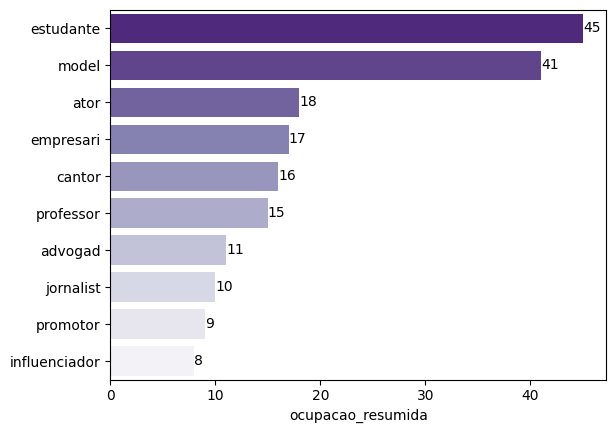

In [80]:
p = sns.barplot(y = data_raw['ocupacao_resumida'].explode().value_counts().index,
            x = data_raw['ocupacao_resumida'].explode().value_counts(),
            order = data_raw['ocupacao_resumida'].explode().value_counts().iloc[:10].index,
            palette = "Purples_r")
p.bar_label(p.containers[0])